# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [3]:
# Import the titanic dataset here
import pandas as pd
import numpy as np

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [46]:
# Code here
passengers = df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]
passengers.head()

joint = pd.crosstab(passengers["class"], passengers["embarked"], normalize = True)
joint

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?

    #### P( S | 3rd Class ) = 0.6967559943582511  
      


* What proportion of Southampton passengers were in 3rd class?

    #### P( 3rd Class | S ) = 0.5404814004376367

In [67]:
# the conditional distribution of their class given where they embarked
joint.iloc[0,0]/sum(joint["B"]) # P(1st|B)
joint.iloc[1,0]/sum(joint["B"]) # P(2nd|B)
joint.iloc[2,0]/sum(joint["B"]) # P(3rd|B)

joint.iloc[0,1]/sum(joint["C"]) # P(1st|C)
joint.iloc[1,1]/sum(joint["C"]) # P(2nd|C)
joint.iloc[2,1]/sum(joint["C"]) # P(3rd|C)

joint.iloc[0,2]/sum(joint["Q"]) # P(1st|Q)
joint.iloc[1,2]/sum(joint["Q"]) # P(2nd|Q)
joint.iloc[2,2]/sum(joint["Q"]) # P(3rd|Q)

joint.iloc[0,3]/sum(joint["S"]) # P(1st|S)
joint.iloc[1,3]/sum(joint["S"]) # P(2nd|S)
joint.iloc[2,3]/sum(joint["S"]) # P(3rd|S)


0.5404814004376367

In [68]:
# the conditional distribution of where they embarked given their class
joint.iloc[0,0]/sum(joint.iloc[0]) # P(B|1st)
joint.iloc[0,1]/sum(joint.iloc[0]) # P(C|1st)
joint.iloc[0,2]/sum(joint.iloc[0]) # P(Q|1st)
joint.iloc[0,3]/sum(joint.iloc[0]) # P(S|1st)

joint.iloc[1,0]/sum(joint.iloc[1]) # P(B|2nd)
joint.iloc[1,1]/sum(joint.iloc[1]) # P(C|2nd)
joint.iloc[1,2]/sum(joint.iloc[1]) # P(Q|2nd)
joint.iloc[1,3]/sum(joint.iloc[1]) # P(S|2nd)

joint.iloc[2,0]/sum(joint.iloc[2]) # P(B|3rd)
joint.iloc[2,1]/sum(joint.iloc[2]) # P(C|3rd)
joint.iloc[2,2]/sum(joint.iloc[2]) # P(Q|3rd)
joint.iloc[2,3]/sum(joint.iloc[2]) # P(S|3rd)

0.6967559943582511

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

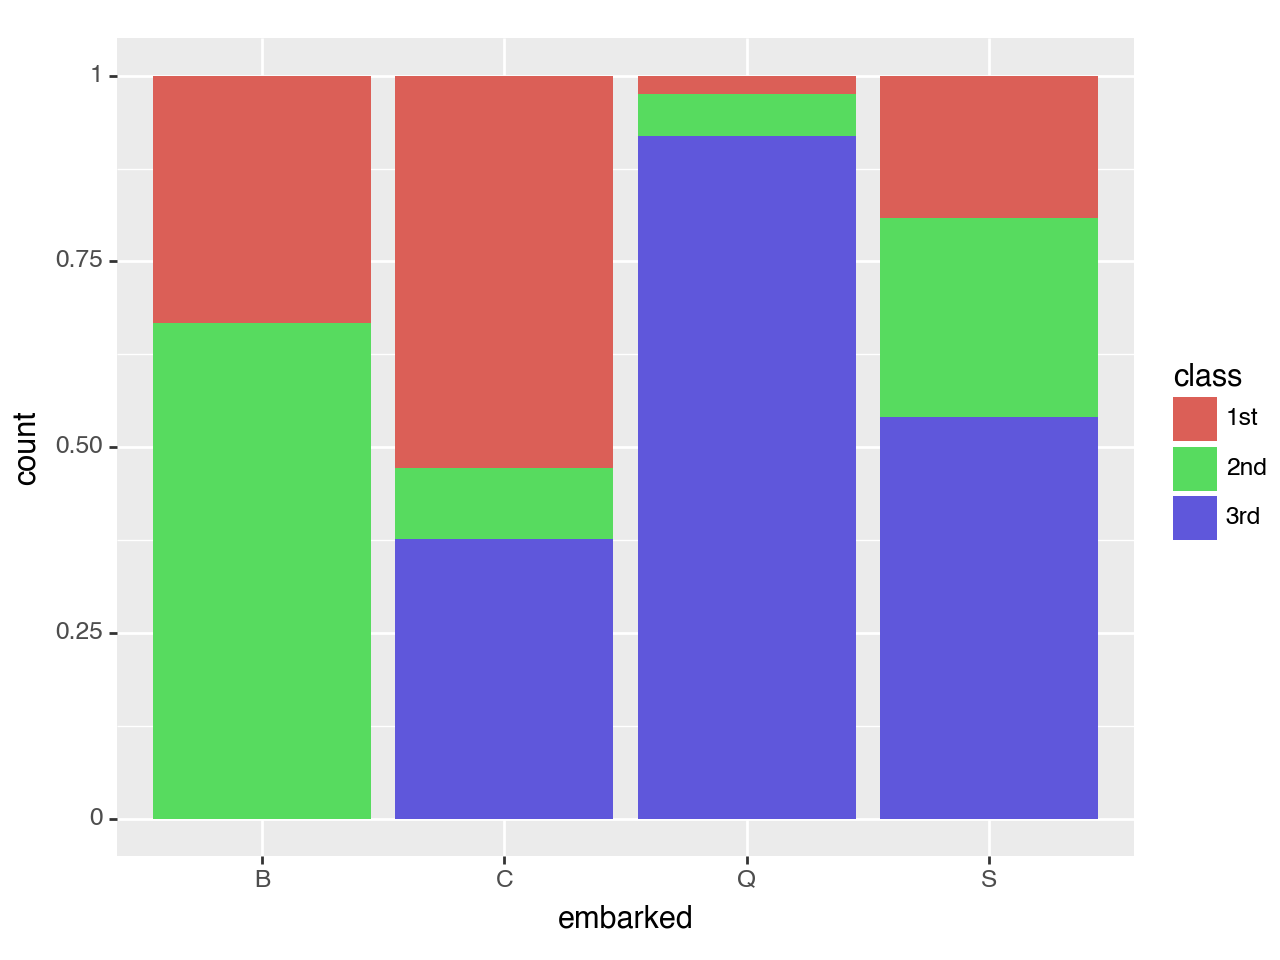

<Figure Size: (640 x 480)>

In [77]:
# Code here
from plotnine import *

(ggplot(passengers,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "fill")
)

The visualization above is nice as we are able give more meaning/visually see the percentages of each class given where they embarked from. For instance, we can immediately see that many people who embarked from Q are in the 3rd class. However, what is not great about this visualization is the fact that the bars can be deceiving. For instance, we cannot tell how many people actually embarked from Q. 